In [1]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import os
os.getcwd()
os.chdir('/home/piai/다운로드')

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
df = pd.read_csv('car_final.csv',encoding='euc-kr')
df

,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Indian_Brand,Age,Brand_encoded,Fuel_Type_Petrol,Transmission_Manual
0,6,19162.000,41000,1,19.67,1582.0,126.20,5.0,1,5,8435.848092,0,1
1,5,6898.320,46000,1,18.20,1199.0,88.70,5.0,1,9,8368.330766,1,1
2,5,9197.760,87000,1,20.77,1248.0,88.76,7.0,0,8,7000.003356,0,1
3,1,27194.710,40670,2,15.20,1968.0,140.80,5.0,1,7,39065.264735,0,0
4,0,5365.360,86999,1,23.08,1461.0,63.10,5.0,1,7,7560.899274,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7,5940.220,89411,1,20.54,1598.0,103.60,5.0,1,9,8197.616752,0,1
7039,10,10661.735,59000,1,17.21,1197.0,103.60,5.0,1,5,8197.616752,1,0
7040,2,6515.080,28000,1,23.08,1461.0,63.10,5.0,1,8,7560.899274,0,1
7041,6,6898.320,52262,3,17.20,1197.0,103.60,5.0,1,7,8197.616752,1,0


# < 변수 확인 >

### Location	int64	차량이 위치한 지역 (숫자로 인코딩됨)
### Price	float64	차량 가격 (예측할 종속변수)
### Kilometers_Driven	int64	주행 거리 (km)
### Owner_Type	int64	소유자 유형 (1=첫 번째 소유주, 2=두 번째 소유주 등)
### Mileage	float64	연비 (km/L)
### Engine	float64	엔진 배기량 (cc)
### Power	float64	차량 출력 (마력, bhp)
### Seats	float64	좌석 수
### Indian_Brand	int64	인도 브랜드 여부 (1=인도 브랜드, 0=비인도 브랜드)
### Age	int64	차량 연식 (나이)
### Fuel_Type_Petrol	int64	가솔린 차량 여부 (1=가솔린, 0=그 외)
### Transmission_Manual	int64	수동 변속기 여부 (1=수동, 0=자동)

In [5]:
print(df.dtypes)

Location                 int64
Price                  float64
Kilometers_Driven        int64
Owner_Type               int64
Mileage                float64
Engine                 float64
Power                  float64
Seats                  float64
Indian_Brand             int64
Age                      int64
Brand_encoded          float64
Fuel_Type_Petrol         int64
Transmission_Manual      int64
dtype: object


In [6]:
# 각 변수의 고유한 값 개수 및 샘플 확인
# 한번씩 그냥 확인해보기 잘못된 샘플이 없는지

unique_values_summary = {
    "변수명": [],
    "고유값 개수": [],
    "샘플 값": []
}

for col in df.columns:
    unique_values_summary["변수명"].append(col)
    unique_values_summary["고유값 개수"].append(len(df[col].unique()))
    unique_values_summary["샘플 값"].append(df[col].unique()[:5])  # 처음 5개 샘플 값

# 데이터프레임으로 변환
unique_values_df = pd.DataFrame(unique_values_summary)
unique_values_df

,변수명,고유값 개수,샘플 값
0,Location,11,"[6, 5, 1, 0, 10]"
1,Price,1566,"[19162.0, 6898.32, 9197.76, 27194.71, 5365.36]"
2,Kilometers_Driven,3571,"[41000, 46000, 87000, 40670, 86999]"
3,Owner_Type,4,"[1, 2, 4, 3]"
4,Mileage,413,"[19.67, 18.2, 20.77, 15.2, 23.08]"
5,Engine,137,"[1582.0, 1199.0, 1248.0, 1968.0, 1461.0]"
6,Power,353,"[126.2, 88.7, 88.76, 140.8, 63.1]"
7,Seats,8,"[5.0, 7.0, 8.0, 4.0, 6.0]"
8,Indian_Brand,2,"[1, 0]"
9,Age,19,"[5, 9, 8, 7, 4]"


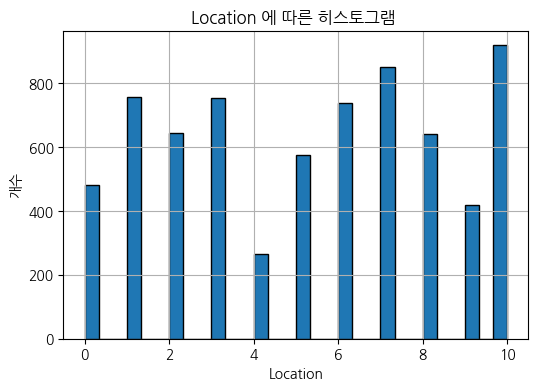

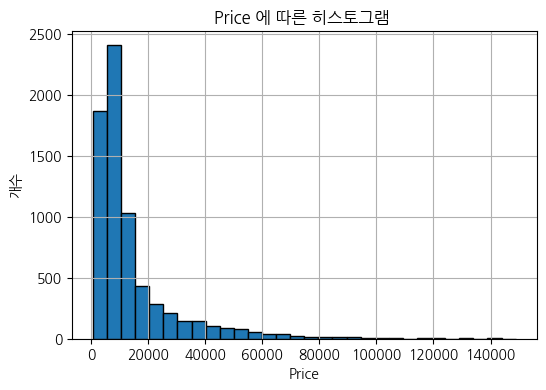

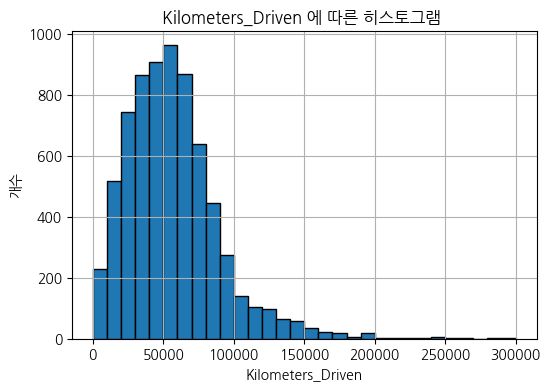

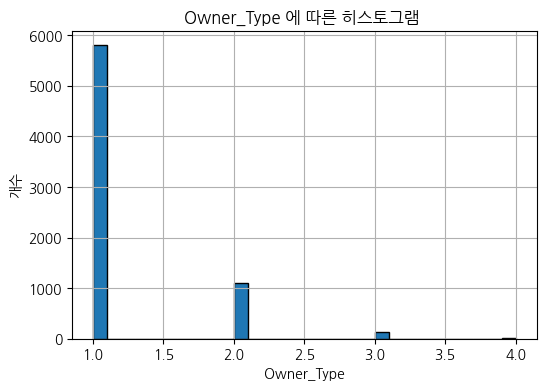

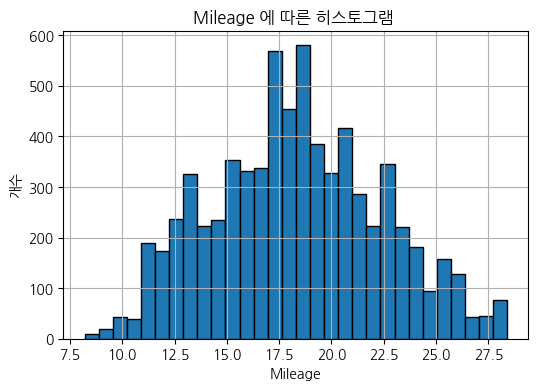

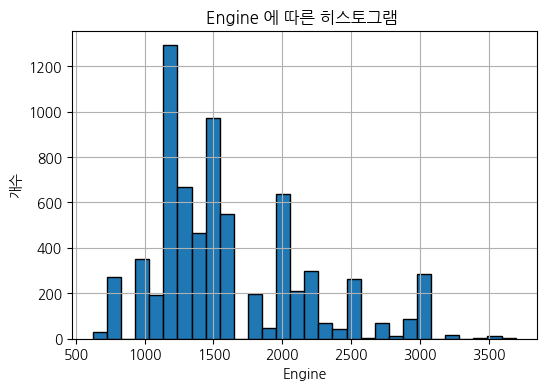

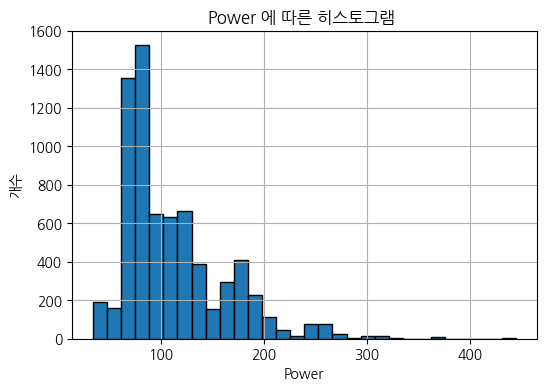

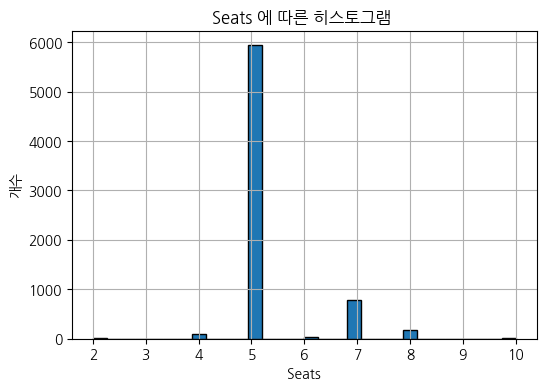

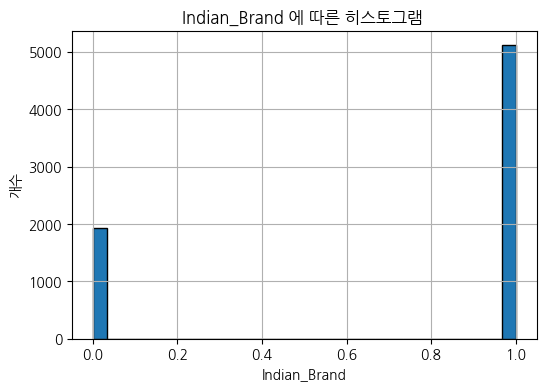

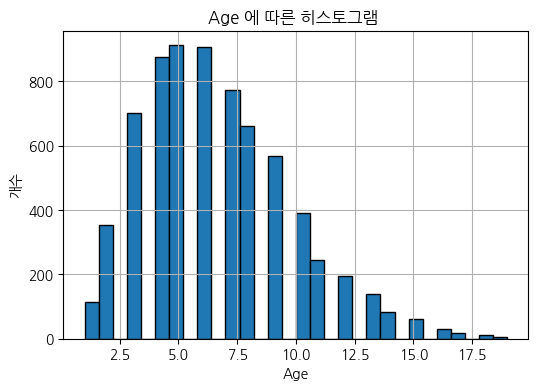

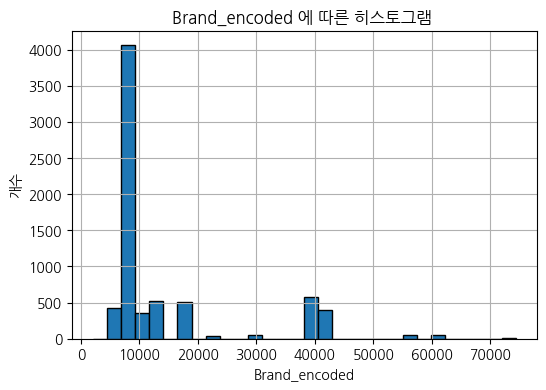

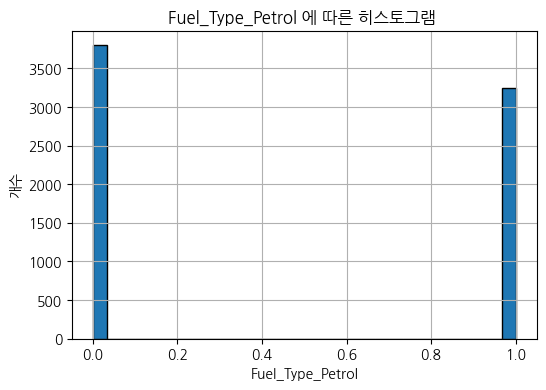

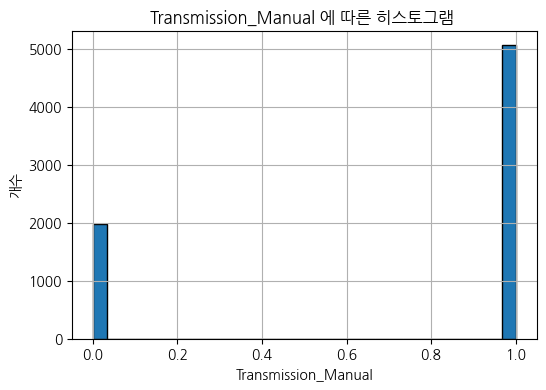

In [7]:
# 각 열별 히스토그램
for col in df.columns:
    # 숫자형 열인지 확인
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(6, 4))
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f"{col} 에 따른 히스토그램 ")
        plt.xlabel(col)
        plt.ylabel("개수")
        plt.show()
    else:
        print(f"Column '{col}' is not numeric and cannot be directly plotted as a histogram.")

## 변수 분포 히스토그램
- 각 변수의 값이 얼마나 많이 존재하는지(데이터 개수) 시각화

* 변수명	해석
- Location (지역)	차량이 특정 지역에 집중되어 있으며, 일부 지역에서는 데이터가 적음.
- Price (가격)	중고차 가격이 낮은 구간(0~500,000)에 집중되어 있음.
- Kilometers_Driven (주행 거리)	대부분의 차량은 20,000~80,000km 범위에 있음.
- Owner_Type (소유자 유형)	첫 번째 소유주 차량이 대부분이며, 두 번째 소유주도 존재. 세 번째 이상은 적음.
- Mileage (연비)	15~22 kmpl 연비 차량이 가장 많음. 일부 연비 0 kmpl 값(이상치) 존재 가능.
- Engine (배기량)	1000~2000cc 차량이 가장 많고, 5000cc 이상 차량은 극소수.
- Power (출력)	대부분의 차량이 50~150bhp 출력을 가짐.
- Seats (좌석 수)	5인승 차량이 대부분이며, 2~7인승 차량도 일부 존재.
- Indian_Brand (인도 브랜드 여부)	인도 브랜드(0) 차량이 적고, 외국 브랜드(1) 차량이 많음.
- Age (차량 연식, 나이)	3~10년 된 차량이 많으며, 15년 이상 된 차량은 적음.
- Fuel_Type_Petrol (연료 - 가솔린 여부)	가솔린 차량(1)이 많고, 그 외(디젤, 전기 등)는 적음.
- Transmission_Manual (변속기 - 수동 여부)	자동 변속기(0) 차량이 적고, 수동 변속기(1)는 많음.

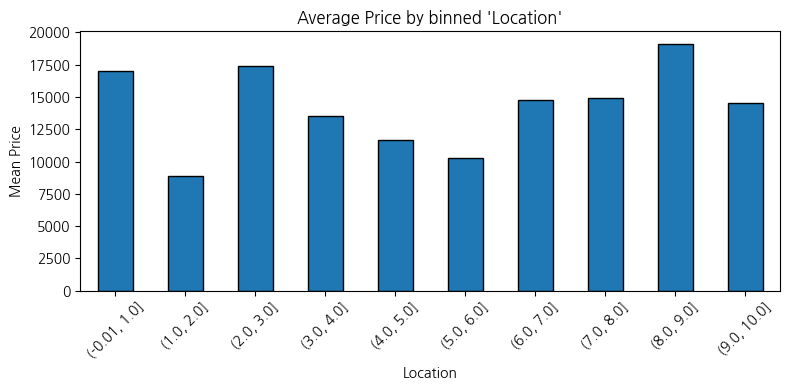

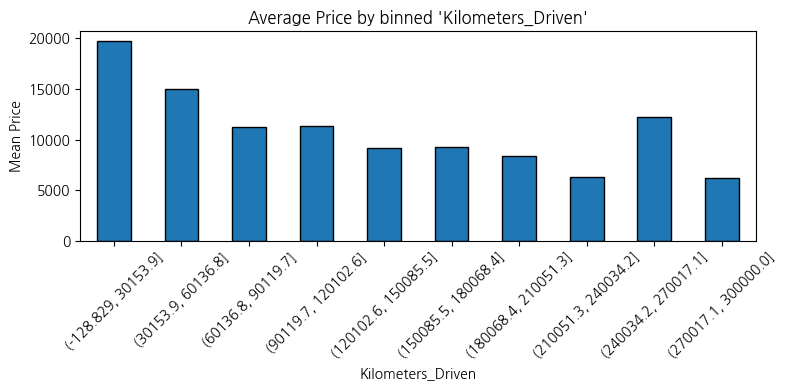

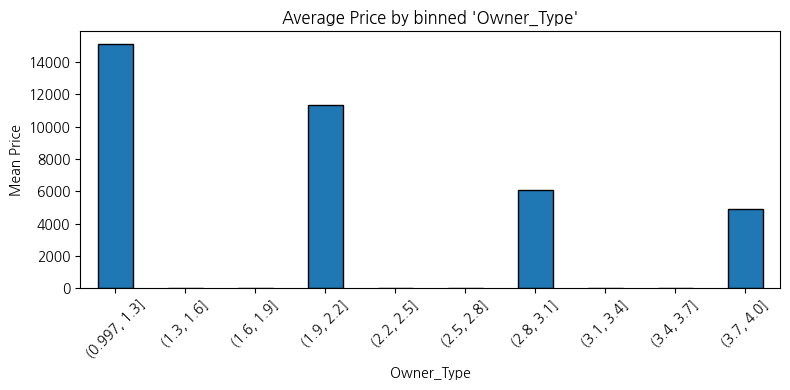

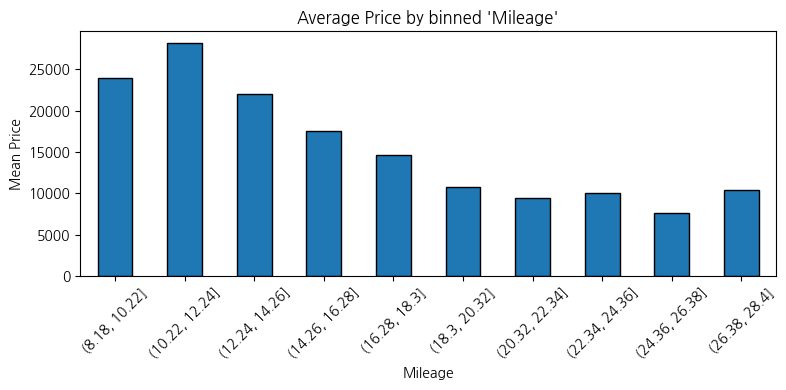

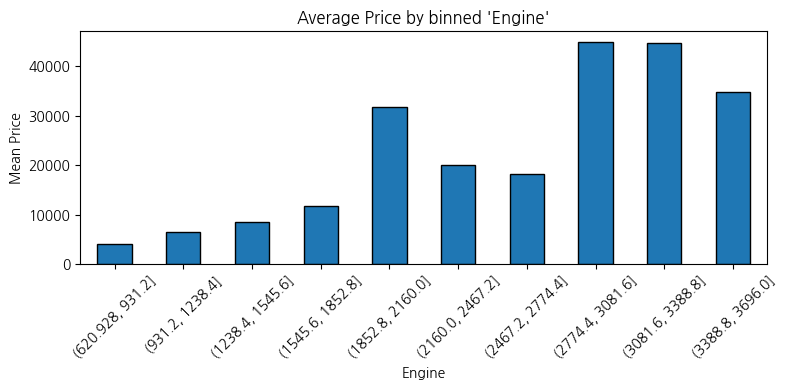

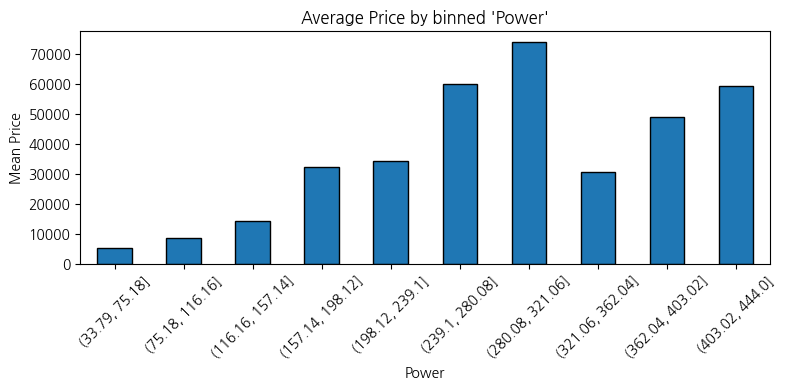

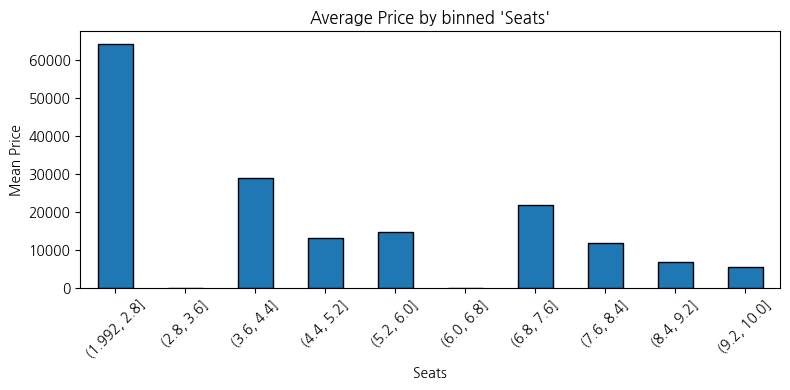

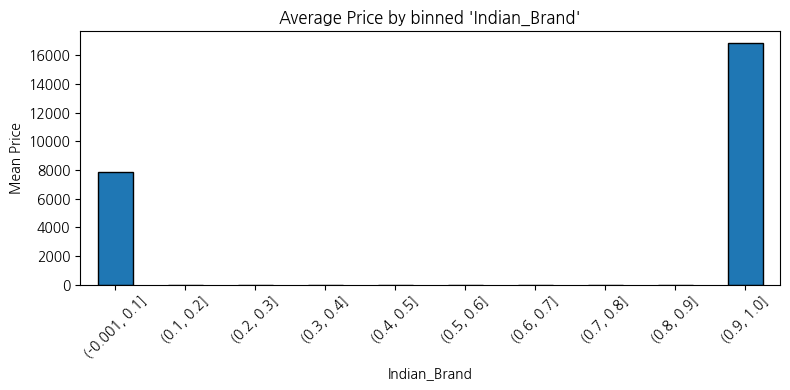

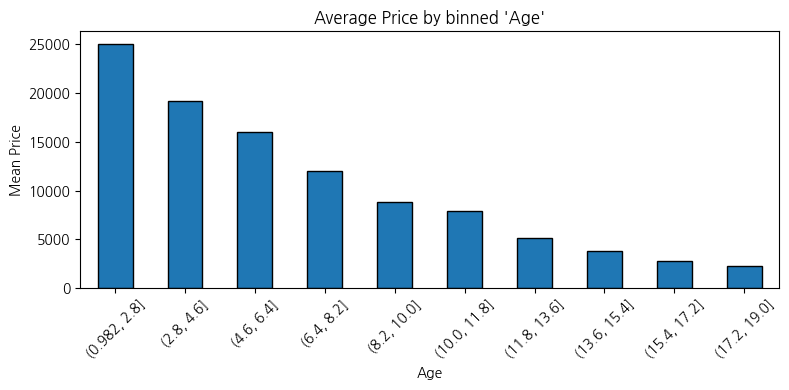

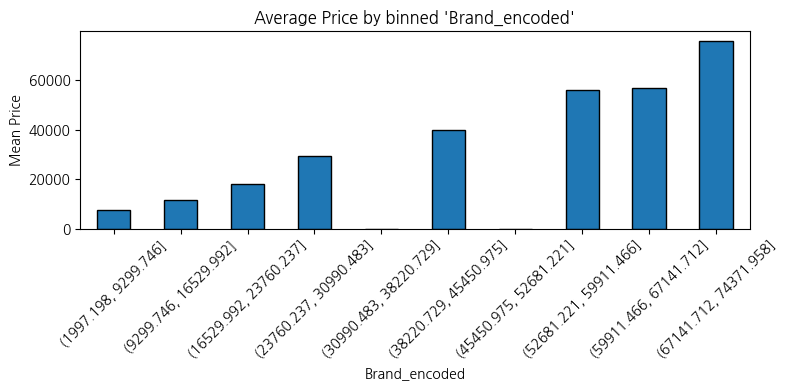

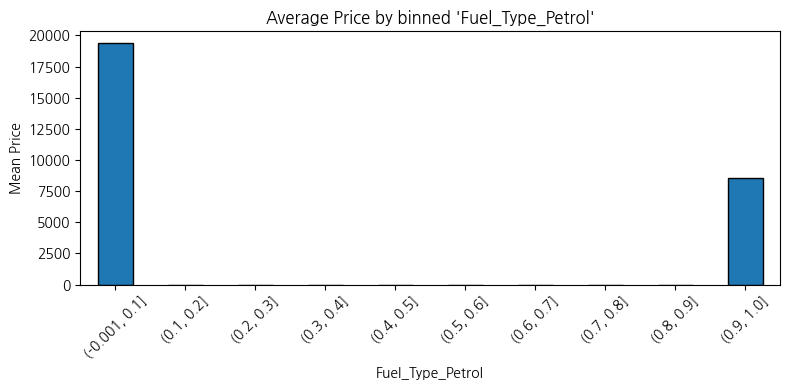

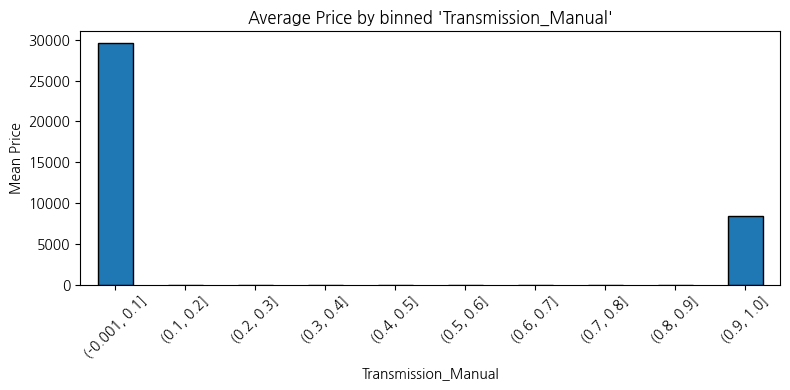

In [8]:
# 대상이 되는 모든 열(Price 자체는 제외)
columns_to_plot = [col for col in df.columns if col != 'Price']

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # 숫자형 열인 경우
    if pd.api.types.is_numeric_dtype(df[col]):
        # 구간(bins)을 나누어 평균 Price를 계산
        # bins=10: 10개 구간, 필요 시 조정 가능
        df['bin'] = pd.cut(df[col], bins=10)
        grouped = df.groupby('bin')['Price'].mean()

        grouped.plot(kind='bar', edgecolor='black')
        plt.title(f"Average Price by binned '{col}'")
        plt.xlabel(col)
        plt.ylabel("Mean Price")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 사용이 끝난 'bin' 열 삭제
        del df['bin']

    else:
        # 범주형 열인 경우
        grouped = df.groupby(col)['Price'].mean()

        grouped.plot(kind='bar', edgecolor='black')
        plt.title(f"Average Price by '{col}'")
        plt.xlabel(col)
        plt.ylabel("Mean Price")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        
#         ### 실행 내용

#     - 각 독립 변수(특징)에 따른 Price(중고차 가격)의 평균값을 계산.
#     - 숫자형 변수 → 10개의 구간(bins=10)으로 나눈 후, 각 구간별 Price 평균값을 구함.
#     - 범주형 변수 → 각 카테고리별 Price 평균값을 계산.

## 각 변수 값에 따른 평균 중고차 가격)
- 각 변수 값에 따른 Price(중고차 가격) 평균을 시각화
* 변수명	해석
- Location (지역)	특정 지역의 차량 가격이 높고, 일부 지역은 상대적으로 저렴함.
- Kilometers_Driven (주행 거리)	주행거리가 많아질수록 차량 가격이 낮아지는 경향.
- Owner_Type (소유자 유형)	첫 번째 소유주 차량이 가장 비싸고, 두 번째 이후로는 가격이 급격히 하락.
- Mileage (연비)	연비가 20 kmpl 이상일 때 차량 가격이 낮은 경향.
- Engine (배기량)	2000cc 이상 차량은 가격이 높으며, 엔진 크기가 클수록 비싼 경향.
- Power (출력)	출력이 높을수록 차량 가격이 높아지는 경향.
    - 300까지 증가하다가 감소하는 경향.
- Seats (좌석 수)	45인승 차량이 가장 비싸고, 67인승 차량은 상대적으로 가격이 낮음.
- Indian_Brand (인도 브랜드 여부)	인도 브랜드 차량(0)은 가격이 낮고, 외국 브랜드 차량(1)은 가격이 높음.
- Age (차량 연식, 나이)	오래된 차량일수록 가격이 낮아지며, 3년 이하 차량은 높은 가격 유지.
- Fuel_Type_Petrol (연료 - 가솔린 여부)	가솔린 차량(1)은 디젤 차량(0)보다 평균 가격이 낮음.
- Transmission_Manual (변속기 - 수동 여부)	자동 변속기(0) 차량이 수동 변속기(1)보다 비쌈.

# 🔹 히스토그램에 따른 결론

    1) 주행거리(Kilometers_Driven), 차량 나이(Age), 소유자 수(Owner_Type), 연비(Mileage)가 많아질수록 가격 하락
    2) 출력(Power), 배기량(Engine)이 높을수록 가격 상승
    3) 자동 변속기(Automatic) 차량이 수동 변속기(Manual)보다 비쌈
    4) 인도 브랜드 차량이 외국 브랜드 차량보다 가격이 낮음
    5) 가솔린 차량이 디젤 차량보다 평균 가격이 낮음

# 통계기법 적용

In [12]:
df1 = pd.read_csv('car_with_brand_and_country.csv',encoding='euc-kr')
df1

,Name,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Brand,Indian_Brand,Country,Age,Brand_encoded,Fuel_Type_Petrol,Transmission_Manual
0,Hyundai Creta 1.6 CRDi SX Option,6,19162.000,41000,1,19.67,1582.0,126.20,5.0,Hyundai,1,South Korea,5,8435.848092,0,1
1,Honda Jazz V,5,6898.320,46000,1,18.20,1199.0,88.70,5.0,Honda,1,Japan,9,8368.330766,1,1
2,Maruti Ertiga VDI,5,9197.760,87000,1,20.77,1248.0,88.76,7.0,Maruti,0,India,8,7000.003356,0,1
3,Audi A4 New 2.0 TDI Multitronic,1,27194.710,40670,2,15.20,1968.0,140.80,5.0,Audi,1,Germany,7,39065.264735,0,0
4,Nissan Micra Diesel XV,0,5365.360,86999,1,23.08,1461.0,63.10,5.0,Nissan,1,Japan,7,7560.899274,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Volkswagen Vento Diesel Trendline,7,5940.220,89411,1,20.54,1598.0,103.60,5.0,Volkswagen,1,Germany,9,8197.616752,0,1
7039,Volkswagen Polo GT TSI,10,10661.735,59000,1,17.21,1197.0,103.60,5.0,Volkswagen,1,Germany,5,8197.616752,1,0
7040,Nissan Micra Diesel XV,2,6515.080,28000,1,23.08,1461.0,63.10,5.0,Nissan,1,Japan,8,7560.899274,0,1
7041,Volkswagen Polo GT TSI,6,6898.320,52262,3,17.20,1197.0,103.60,5.0,Volkswagen,1,Germany,7,8197.616752,1,0


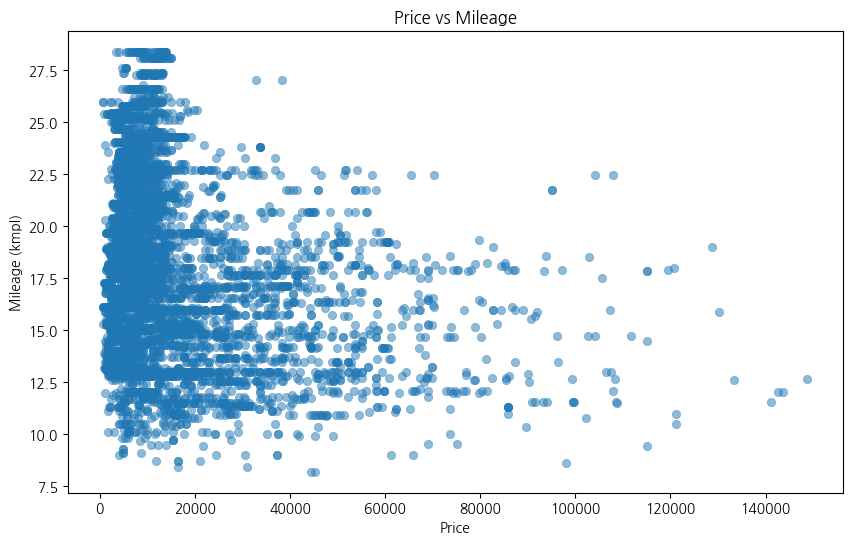

In [13]:
# 1️⃣ 가격(Price)과 연비(Mileage) 관계 분석 - 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['Price'], y=df1['Mileage'], alpha=0.5, edgecolor=None)
plt.title("Price vs Mileage")
plt.xlabel("Price")
plt.ylabel("Mileage (kmpl)")
plt.show()



## 가격과 연비(Mileage) 관계 (첫 번째 그래프 - 산점도)

  -  연비(Mileage)와 가격(Price) 간에 명확한 상관관계가 보이지 않음.
  -  일반적으로 가격이 높은 차량은 연비가 낮은 경향이 있음 (고급차는 연비보다 성능에 집중).
  -  가격이 낮은 차량은 연비가 높은 경향이 있음 (경제적인 차량).

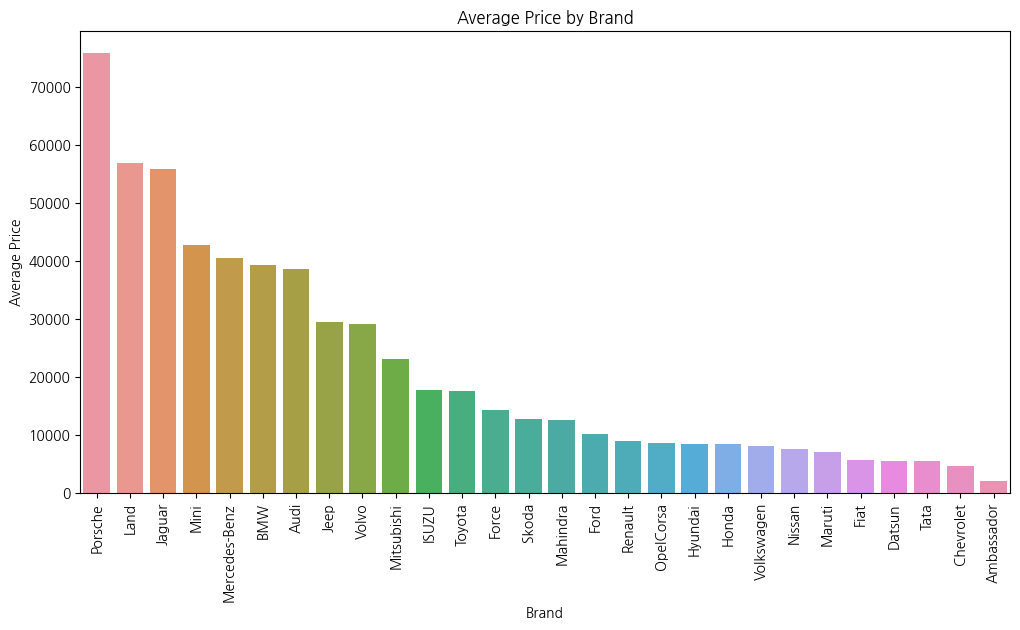

In [14]:
# 2️⃣ 브랜드별 평균 가격 및 연비 분석
brand_stats = df1.groupby("Brand").agg({"Price": "mean", "Mileage": "mean"}).sort_values(by="Price", ascending=False)

# 브랜드별 평균 가격 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_stats.index, y=brand_stats["Price"])
plt.xticks(rotation=90)
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()


## 브랜드별 평균 가격 (두 번째 그래프 - 막대 그래프)

   -  가장 비싼 브랜드: Lamborghini, Porsche, Jaguar, Bentley 등 럭셔리 브랜드가 가장 비쌈.
   -  중간 가격 브랜드: BMW, Audi, Mercedes-Benz 등 프리미엄 브랜드.
   -  가장 저렴한 브랜드: Maruti, Tata, Hyundai, Datsun 등 대중 브랜드가 가격이 낮음

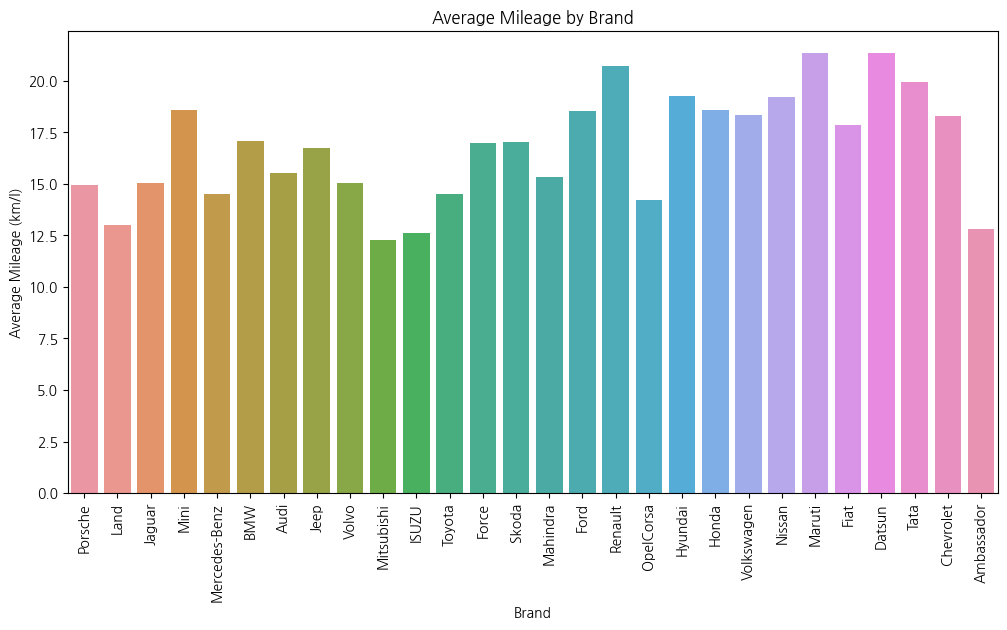

In [15]:

# 브랜드별 평균 연비 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_stats.index, y=brand_stats["Mileage"])
plt.xticks(rotation=90)
plt.title("Average Mileage by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Mileage (km/l)")
plt.show()

## 브랜드별 평균 연비 (세 번째 그래프 - 막대 그래프)

   -  연비가 높은 브랜드: Maruti, Tata, Honda, Hyundai 등의 대중 브랜드는 연비가 좋음.
   -  연비가 낮은 브랜드: Lamborghini, Porsche, Bentley 같은 고급차 브랜드는 연비가 낮음.
   -  SUV/럭셔리 브랜드는 연비가 낮고, 경제형 차량은 연비가 높음.

# 가격에 따른 브랜드와 연비 ANOVA

In [16]:
#  브랜드에 따른 가격 차이 검정 (ANOVA - Price by Brand)
anova_price = smf.ols('Price ~ C(Brand)', data=df1).fit()
anova_table_price = sm.stats.anova_lm(anova_price, typ=2)


#  브랜드에 따른 연비 차이 검정 (ANOVA - Mileage by Brand)
anova_mileage = smf.ols('Mileage ~ C(Brand)', data=df1).fit()
anova_table_mileage = sm.stats.anova_lm(anova_mileage, typ=2)



# 결과 출력
print(" ANOVA - 브랜드에 따른 가격")
print(anova_table_price)
print("\n ANOVA - 브랜드에 따른 연비 ")
print(anova_table_mileage)

 ANOVA - 브랜드에 따른 가격
                sum_sq      df           F  PR(>F)
C(Brand)  1.081027e+12    27.0  364.286676     0.0
Residual  7.710047e+11  7015.0         NaN     NaN

 ANOVA - 브랜드에 따른 연비 
                sum_sq      df          F  PR(>F)
C(Brand)  37982.239970    27.0  127.10499     0.0
Residual  77639.348978  7015.0        NaN     NaN


## ANOVA(아노바) 분석 결과 - 브랜드에 따른 가격 및 연비 차이 검정

1) 브랜드별 가격 차이 검정 (ANOVA - Price by Brand)

  -   PR(>F) = 0.0 → 브랜드에 따른 가격 차이가 통계적으로 유의미함 (p-value < 0.05).
  -   즉, 브랜드가 가격에 미치는 영향이 크다고 볼 수 있음.

2) 브랜드별 연비 차이 검정 (ANOVA - Mileage by Brand)

  -  PR(>F) = 0.0 → 브랜드에 따른 연비 차이도 유의미함.
  -  즉, 어떤 브랜드는 연비가 좋고, 어떤 브랜드는 연비가 낮은 경향이 존재.

### SSE와 SSA 값이 적절한가?

- SSA (C(Brand)) 값이 크다는 것은, 브랜드가 가격과 연비 차이에 영향을 준다는 것을 의미함.
- SSE 값이 SSA보다 작은 경우, 모델이 데이터를 잘 설명하고 있다는 신호일 수 있음.
- F값이 매우 크고, p-value가 0.0이므로 브랜드가 가격과 연비에 미치는 영향이 통계적으로 유의미함.

즉, 현재 SSE와 SSA 값이 크지만, F값이 높고 p-value가 유의미하기 때문에 분석 결과는 적절함.

# 다중 회귀 분석 (Price ~ Mileage + Brand)

In [17]:
# 다중 회귀 분석: 가격을 연비와 브랜드로 예측
regression_model = smf.ols('Price ~ Mileage + C(Brand)', data=df1).fit()

# 회귀 분석 결과 출력
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     351.4
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:12:47   Log-Likelihood:                -75180.
No. Observations:                7043   AIC:                         1.504e+05
Df Residuals:                    7014   BIC:                         1.506e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# 다중 회귀 분석 결과 (Price ~ Mileage + Brand)

## 모델 설명력 (R² Score) = 0.585

    - 58.5%의 가격 변동을 Mileage(연비)와 Brand(브랜드)로 설명 가능
    - 브랜드별로 가격 차이가 크기 때문에 예측 성능이 괜찮은 편
    
## Mileage (연비)와 가격의 관계

  -   회귀 계수(coef) = -2.4375 → 연비가 증가해도 가격에는 거의 영향 없음
  -   p-value = 0.943 → 연비(Mileage)는 차량 가격에 유의미한 영향을 미치지 않음
        - 즉, 브랜드가 가격을 결정하는 주된 요인이며, 연비는 가격에 거의 영향 없음
    
## 브랜드(Brand)와 가격의 관계
=> 고급 브랜드 차량의 가격이 유의미하게 높음

    - Lamborghini (+181,900)
    - Porsche (+72,300)
    - Jaguar, Land Rover, Bentley, BMW, Audi → 가격 상승 요인
    - 일반 브랜드는 가격 영향이 크지 않음
    - Maruti, Tata, Hyundai, Renault 등의 브랜드는 가격 차이가 크지 않음